# Model Definition and Evaluation
## Table of Contents
1. [Model Selection](#model-selection)
2. [Feature Engineering](#feature-engineering)
3. [Hyperparameter Tuning](#hyperparameter-tuning)
4. [Implementation](#implementation)
5. [Evaluation Metrics](#evaluation-metrics)
6. [Comparative Analysis](#comparative-analysis)


In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense


## Model Selection

We consider LSTM and GRU architectures because recurrent neural networks are specifically designed to capture temporal dependencies, nonlinear dynamics, and long range patterns in electricity price data. Their ability to learn from sequential structures, incorporate multiple exogenous features, and model complex volatility makes them strong candidates for achieving higher forecast accuracy compared to traditional statistical baselines such as SARIMAX.


## Feature Engineering

[Describe any additional feature engineering you've performed beyond what was done for the baseline model.]


In [71]:
# Load the dataset
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

drive.mount('/content/drive')

path = "/content/drive/MyDrive/Forcasting based on Energy Charts datasets/Energy_Charts_2025_January_to_June.csv"

df = (
    pd.read_csv(path, low_memory=False)
      .fillna(0)
      .query("`Date (GMT+1)` == `Date (GMT+1)`")  # filter notna()
)
df['Date (GMT+1)'] = pd.to_datetime(df['Date (GMT+1)'], infer_datetime_format=True)
df = df.set_index(['Date (GMT+1)'])
#df['Date (GMT+1)'] = pd.to_datetime(df['Date (GMT+1)'], infer_datetime_format=True)
#print(df.head())

#df_num = df.drop(columns=['Date (GMT+1)']).astype(np.float32)
target = df['Day Ahead Auction (DE-LU)'].values

#print(ts_data.head())

# Ensure all data is in float format
#ts_data = ts_data.astype(np.float32)

#y = df['Day Ahead Auction (DE-LU)']

look_back = 5

#X, y = window(df.values, look_back)






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-1936693089.py:15: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date (GMT+1)'] = pd.to_datetime(df['Date (GMT+1)'], infer_datetime_format=True)
/tmp/ipython-input-1936693089.py:15: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date (GMT+1)'] = pd.to_datetime(df['Date (GMT+1)'], infer_datetime_format=True)


In [72]:
def window_multivariate(features, target, look_back):
   X, y = [], []
   for i in range(len(features) - look_back):
     X.append(features[i:i+look_back]) # alle 23 Features
     y.append(target[i+look_back]) # nur Preis
   return np.array(X), np.array(y)
X, y = window_multivariate(df.values, target, look_back)

In [73]:
n_features = df.shape[1]
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [74]:
# Train-test split
train_ratio = 0.8
train_size = int(train_ratio * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



## Hyperparameter Tuning




In [75]:
# Implement hyperparameter tuning



## Implementation




In [76]:
# Implement the final model(s)
# Create and train LSTM model

model = Sequential()
model.add(LSTM(units=128, activation='swish', input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mape'])

model.fit(x=X_train, y=y_train, epochs=50, batch_size=100, verbose=2)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
139/139 - 4s - 29ms/step - loss: 966833.5625 - mape: 5079800832.0000
Epoch 2/50
139/139 - 2s - 14ms/step - loss: 229347.3594 - mape: 2967162368.0000
Epoch 3/50
139/139 - 3s - 18ms/step - loss: 68044.1641 - mape: 1299186944.0000
Epoch 4/50
139/139 - 3s - 21ms/step - loss: 32538.2441 - mape: 827045376.0000
Epoch 5/50
139/139 - 4s - 30ms/step - loss: 27634.4961 - mape: 775629696.0000
Epoch 6/50
139/139 - 2s - 14ms/step - loss: 12671.5576 - mape: 594243200.0000
Epoch 7/50
139/139 - 2s - 13ms/step - loss: 5076.6118 - mape: 417062848.0000
Epoch 8/50
139/139 - 2s - 14ms/step - loss: 3969.3730 - mape: 394358464.0000
Epoch 9/50
139/139 - 3s - 22ms/step - loss: 3590.7361 - mape: 318953760.0000
Epoch 10/50
139/139 - 2s - 17ms/step - loss: 2547.2351 - mape: 246176432.0000
Epoch 11/50
139/139 - 2s - 13ms/step - loss: 2207.1868 - mape: 229330048.0000
Epoch 12/50
139/139 - 2s - 13ms/step - loss: 1848.5613 - mape: 191915952.0000
Epoch 13/50
139/139 - 2s - 13ms/step - loss: 1571.8151 - mape:

In [77]:
# Make predictions
forecasts = model.predict(X_test)
lstm_fits = model.predict(X_train)

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [78]:
# Calculate metrics
mape = mean_absolute_percentage_error(y_test, forecasts)
r2 = r2_score(y_train, lstm_fits)

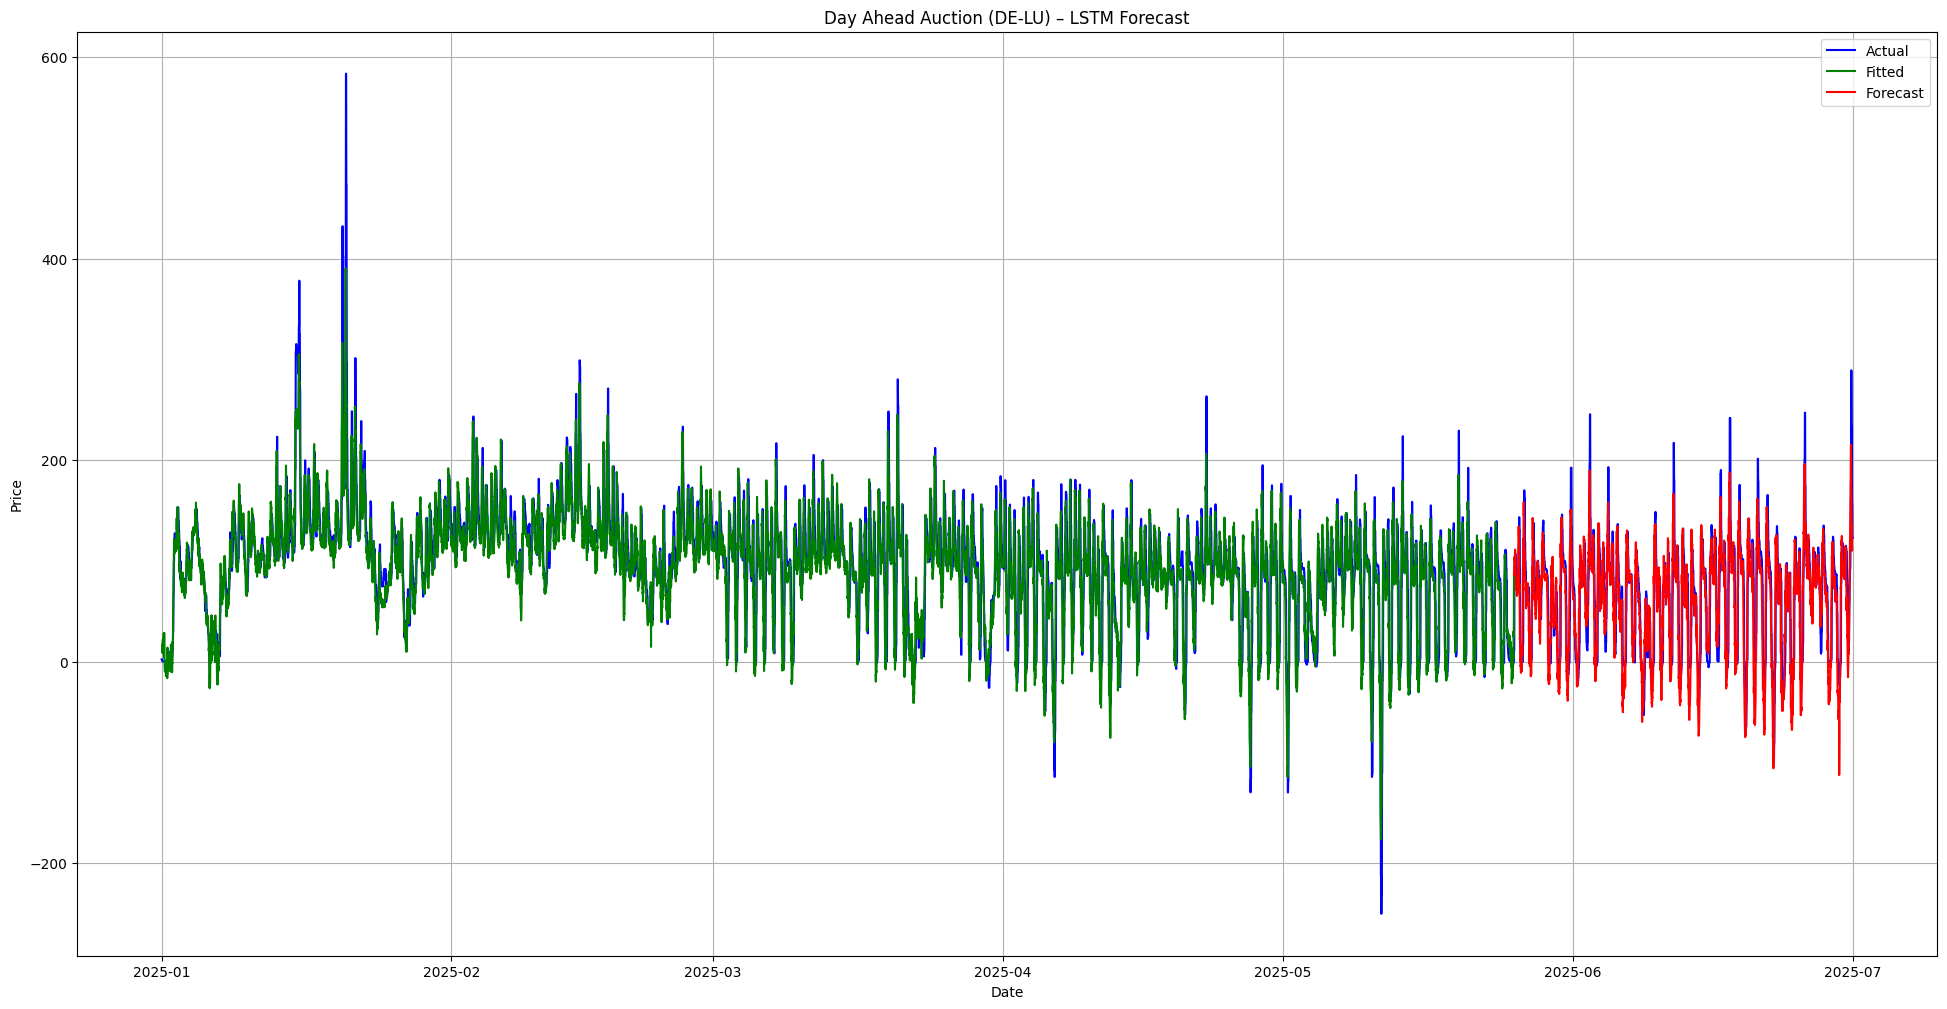

In [86]:
# train_size MUST come from X, not df
#print("len(df) =", len(df))
#print("len(X) =", len(X))
#print("train_size =", train_size)
#print("len(lstm_fits) =", len(lstm_fits))
#print("fits slice length =", train_size - look_back)

train_size = int(0.8 * len(X))

# 1. Use the real datetime index
date_range = df.index

# 2. Actual data
ts_data = df['Day Ahead Auction (DE-LU)']

# 3. Create fitted values aligned with the training period
fits = np.full(train_size, np.nan)

# Align fitted values by removing the first look_back predictions
lstm_fits_aligned = lstm_fits[look_back:]

# Insert aligned fitted values
fits[look_back : look_back + len(lstm_fits_aligned)] = lstm_fits_aligned.flatten()


# 4. Flatten forecasts
forecasts = forecasts.flatten()

# 5. Plot
plt.figure(figsize=(24, 12))

plt.plot(date_range, ts_data, label='Actual', color='blue')
plt.plot(date_range[:train_size], fits, label='Fitted', color='green')
plt.plot(date_range[train_size : train_size + len(forecasts)],
         forecasts, label='Forecast', color='red')

plt.title('Day Ahead Auction (DE-LU) – LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.grid(True)
plt.show()


## Evaluation Metrics

We evaluate the model using R², MSE, RMSE, and MAE. These metrics capture different aspects of forecasting performance:




In [90]:
# Evaluate the model using your chosen metrics
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print(r2_score(list(y_test), list(forecasts)))

# Metrics
r2 = r2_score(y_test, forecasts)
mse = mean_squared_error(y_test, forecasts)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, forecasts)

print("R²:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)



0.8836387915795975
R²: 0.8836387915795975
MSE: 331.0454052959218
RMSE: 18.194653206256003
MAE: 13.079722743312484


## Comparative Analysis

The LSTM achieves the best performance overall, with an R² of 0.88 and significantly lower errors than both SARIMAX and XGBoost. Its MSE (331) and RMSE (18.19) show that it captures the temporal patterns in the data far more effectively, making it the strongest forecasting model in this comparison.

XGBoost  
MSE: 1358.9230238188288  
RMSE: 36.86357312875176   

Baseline Model (SARIMAX)
MSE: 1424.2550828672138    
RMSE: 37.7393042181121  

LSTM_GRU

R²: 0.8836387915795975  
MSE: 331.0454052959218  
RMSE: 18.194653206256003  
MAE: 13.079722743312484  
